In [0]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torchvision

In [0]:
trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True, 
                                      download=True,
                                      transform=torchvision.transforms.ToTensor())

testset = torchvision.datasets.MNIST(root='./data',
                                     train=False, 
                                     download=True,
                                     transform=torchvision.transforms.ToTensor())

In [0]:
batch_size = 4

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          num_workers=0,
                                          shuffle=True)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         num_workers=0,
                                         shuffle=True)

In [0]:
def imshow(img):
  np_img = img.numpy()
  plt.imshow(np.transpose(np_img, (1, 2, 0)))
  plt.show()

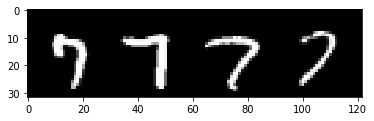

tensor([7, 7, 7, 7])


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(labels)

In [0]:
in_features, hidden_size_1, hidden_size_2, output_size = 28*28, 256, 64, 10

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features, hidden_size_1),
    nn.ReLU(),
    nn.Linear(hidden_size_1, hidden_size_2),
    nn.ReLU(),
    nn.Linear(hidden_size_2, output_size)
)

loss_fn = nn.CrossEntropyLoss()

In [0]:
def predict(model, data, loss_fn):
  images, labels = data
  
  # forward pass: model makes prediction
  out = model(images)

  # computes loss and accuracy
  loss = loss_fn(out, labels)
  _, pred = torch.max(out, 1)
  total = labels.shape[0]
  correct = (pred == labels).sum().item()

  # returns statistics
  return loss, total, correct 


In [0]:
def train_epoch(model, optimizer, trainloader):
  # reset epoch statistics
  running_loss = 0.0
  total, correct = 0.0, 0.0

  for i, data in enumerate(trainloader, 1):
    # training step
    optimizer.zero_grad()
    loss, total_step, correct_step = predict(model, data, loss_fn)
    loss.backward()
    optimizer.step()

    # update statistics
    total += total_step
    correct += correct_step
    running_loss += loss.item()

    # print info
    if i % log_every == 0:
      print('Iter {} - Loss: {:.4f}'.format(i, running_loss/log_every))
      running_loss = 0.0

  return 100*correct/total

In [0]:
def evaluate(model, testloader):
  running_loss = 0.0
  total, correct = 0.0, 0.0

  for i, data in enumerate(testloader, 1):
    # forward function
    loss, total_step, correct_step = predict(model, data, loss_fn)

    # update statistics
    total += total_step
    correct += correct_step
    running_loss += loss.item()

  # print info
  print('Test loss: {:.4f}'.format(running_loss/i))
  running_loss = 0.0

  return 100*correct/total

In [10]:
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_epoch = 4
log_every = 5000

model.train()
for epoch in range(num_epoch):
  print('Starting Epoch {}/{}...'.format(epoch+1, num_epoch))
  accuracy = train_epoch(model, optimizer, trainloader)
  print('Epoch {} - Accuracy: {:.2f}%'.format(epoch+1, accuracy))
  
print('Finished training')

Starting Epoch 1/4...
Iter 5000 - Loss: 2.1312
Iter 10000 - Loss: 1.1761
Iter 15000 - Loss: 0.6164
Epoch 1 - Accuracy: 64.08%
Starting Epoch 2/4...
Iter 5000 - Loss: 0.4650
Iter 10000 - Loss: 0.4031
Iter 15000 - Loss: 0.3632
Epoch 2 - Accuracy: 88.65%
Starting Epoch 3/4...
Iter 5000 - Loss: 0.3413
Iter 10000 - Loss: 0.3278
Iter 15000 - Loss: 0.3144
Epoch 3 - Accuracy: 90.67%
Starting Epoch 4/4...
Iter 5000 - Loss: 0.3051
Iter 10000 - Loss: 0.2858
Iter 15000 - Loss: 0.2819
Epoch 4 - Accuracy: 91.65%
Finished training


In [11]:
model.eval()
with torch.no_grad():
  accuracy = evaluate(model, testloader)
  print('Test accuracy: {:.2f}%'.format(accuracy))

Test loss: 0.2680
Test accuracy: 92.49%


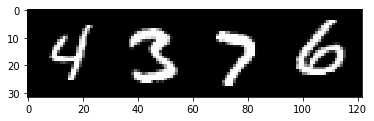

predette: tensor([4, 3, 7, 6])
corrette: tensor([4, 3, 7, 6])


In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()

model.eval()
out = model(images)
_, pred = torch.max(out, 1)

imshow(torchvision.utils.make_grid(images))
print('predette: {}'.format(pred))
print('corrette: {}'.format(labels))